In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataunderstanding import correlations

In [2]:
cyclists = pd.read_csv('dataset/cyclists.csv')
races = pd.read_csv('dataset/races.csv')

In [3]:
# Calculate the distinct number of bins
n_bins_weight = cyclists['weight'].nunique()
print('Optimal number of bins for weight:', n_bins_weight)

Optimal number of bins for weight: 59


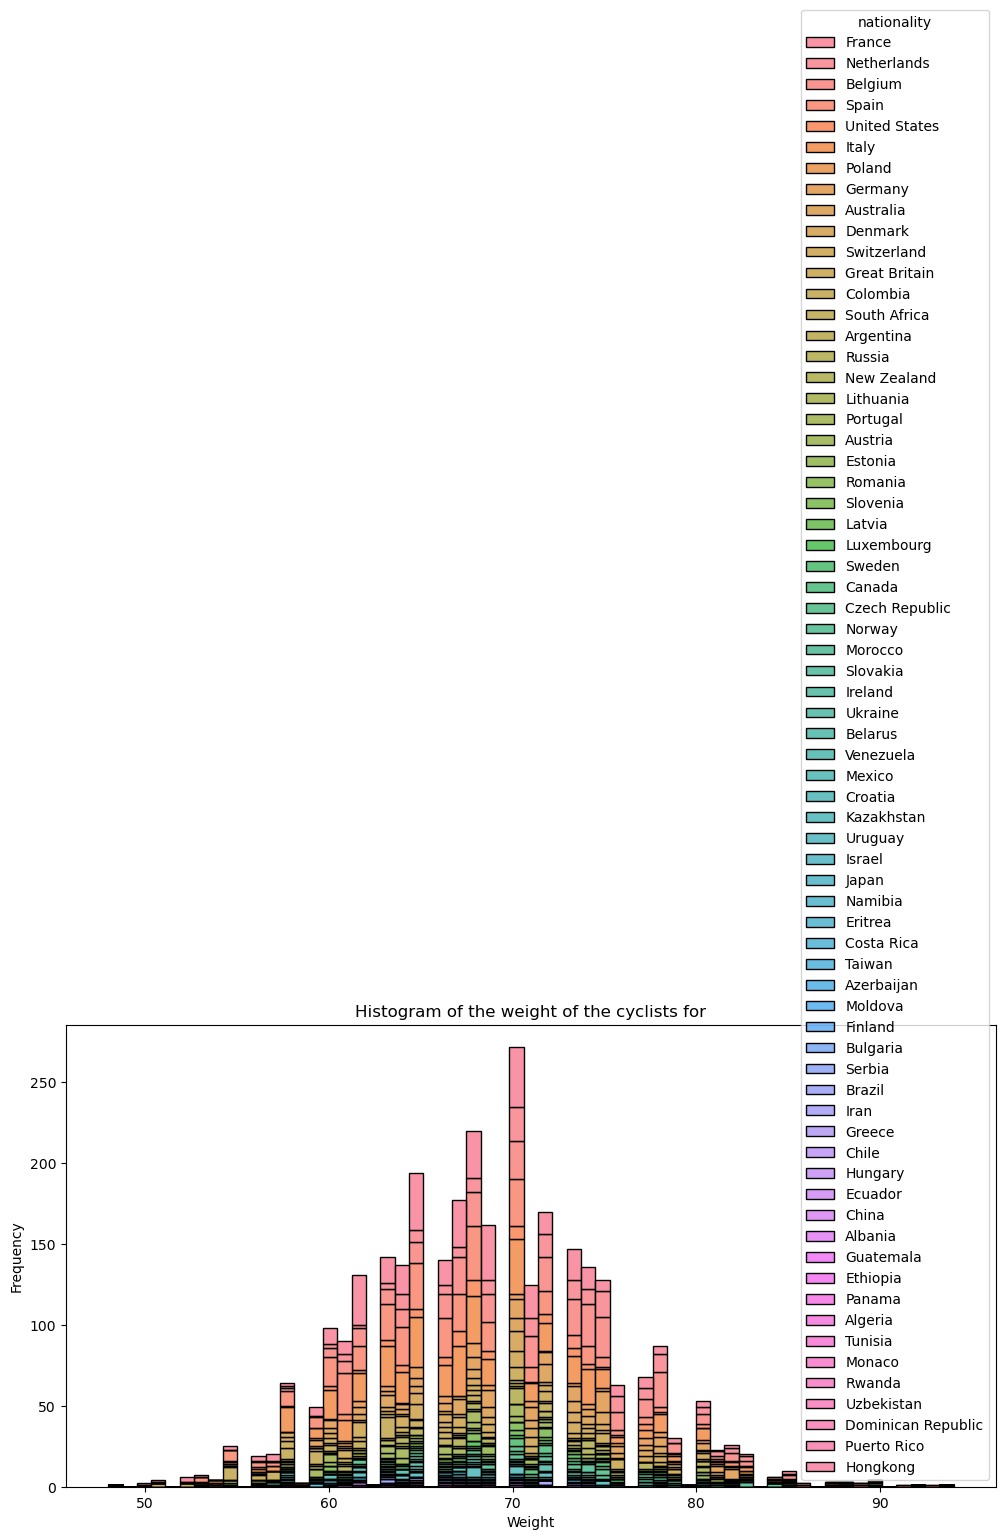

In [4]:
#Print the histogram occorrences of the weight (where is not null) of the cyclists for each nationality
cyclists_tmp = cyclists[cyclists['weight'].notnull()]
plt.figure(figsize=(12, 6))
sns.histplot(cyclists_tmp, x='weight', hue='nationality', multiple='stack', bins=n_bins_weight)
plt.title('Histogram of the weight of the cyclists for')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

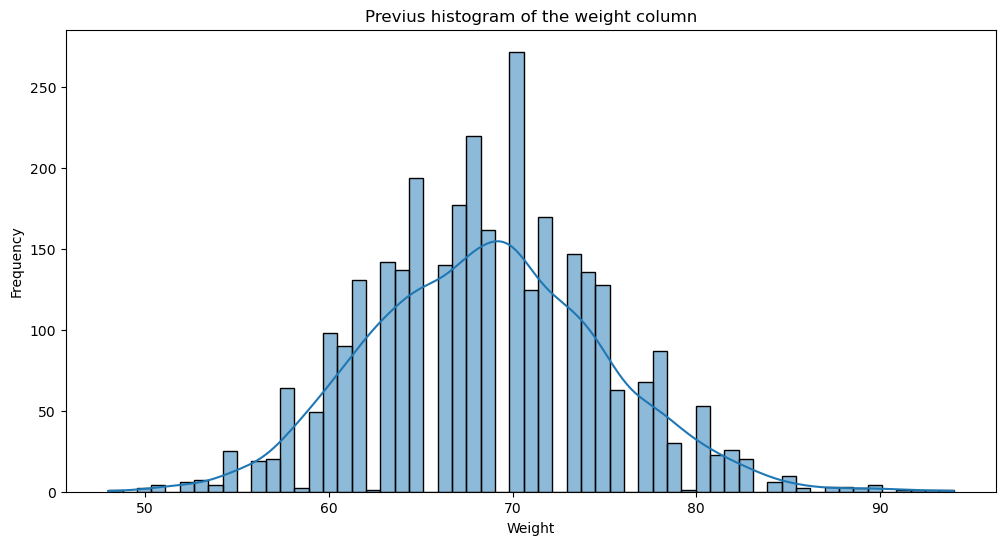

In [5]:
# Plot the histogram of the weight column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['weight'], kde=True, bins=n_bins_weight)
plt.title('Previus histogram of the weight column')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Calculate the median of the weight for each nationality
median_weight = cyclists.groupby('nationality')['weight'].median()

#Fill the missing values with the median of the weight in base of nationality
cyclists['weight'] = cyclists['weight'].fillna(cyclists['nationality'].map(median_weight))

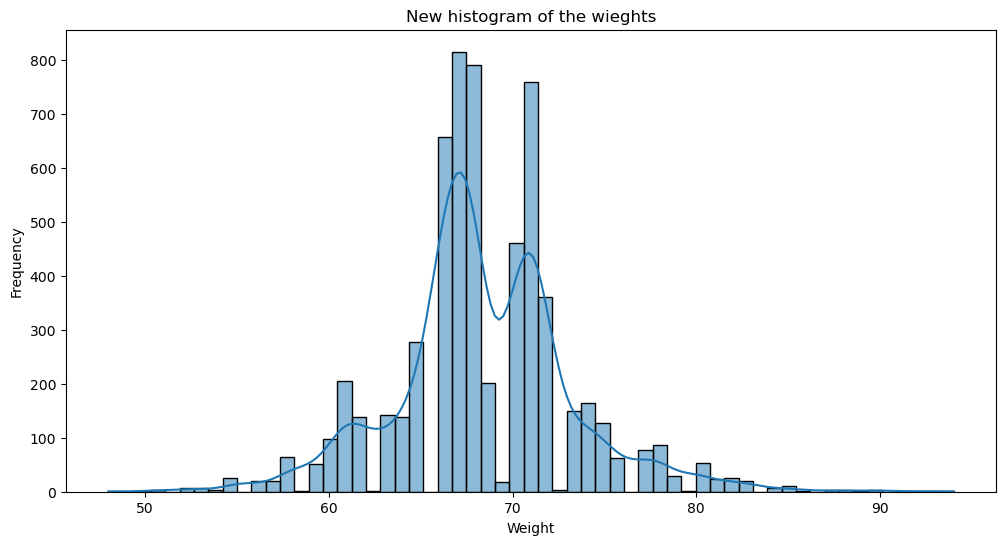

In [7]:


# Plot the histogram of the weight column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['weight'], kde=True, bins=n_bins_weight)
plt.title('New histogram of the wieghts')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Calculate the optimal number of unique where the height column is not null
n_bins_height = cyclists['height'].nunique()
print('Optimal number of bins for height:', n_bins_height)

Optimal number of bins for height: 48


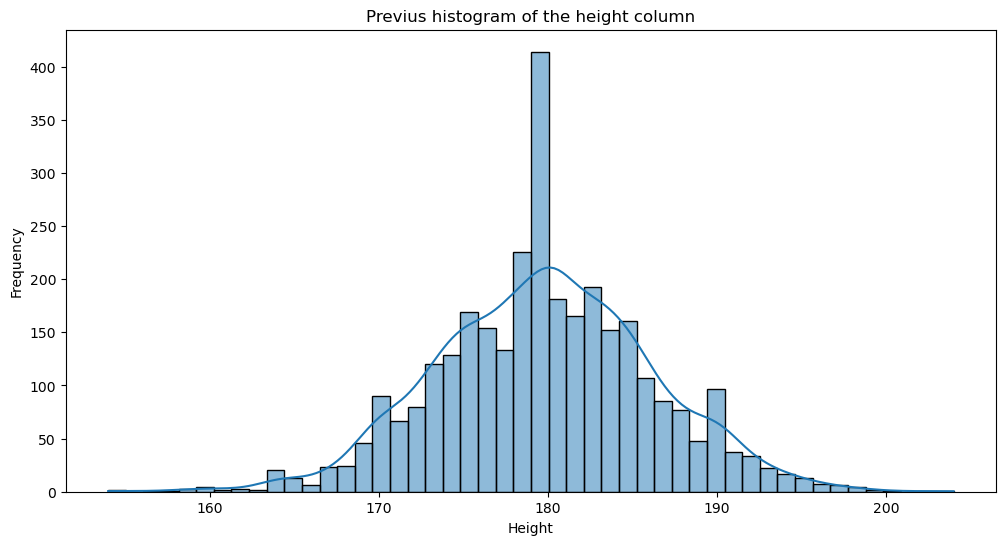

In [9]:
# Plot the histogram of the height column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['height'], kde=True, bins=n_bins_height)
plt.title('Previus histogram of the height column')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Calculate the median of the height
median_height = cyclists.groupby('nationality')['height'].median()

#Fill the missing values with the median of the height in base
cyclists['height'] = cyclists['height'].fillna(cyclists['nationality'].map(median_height))


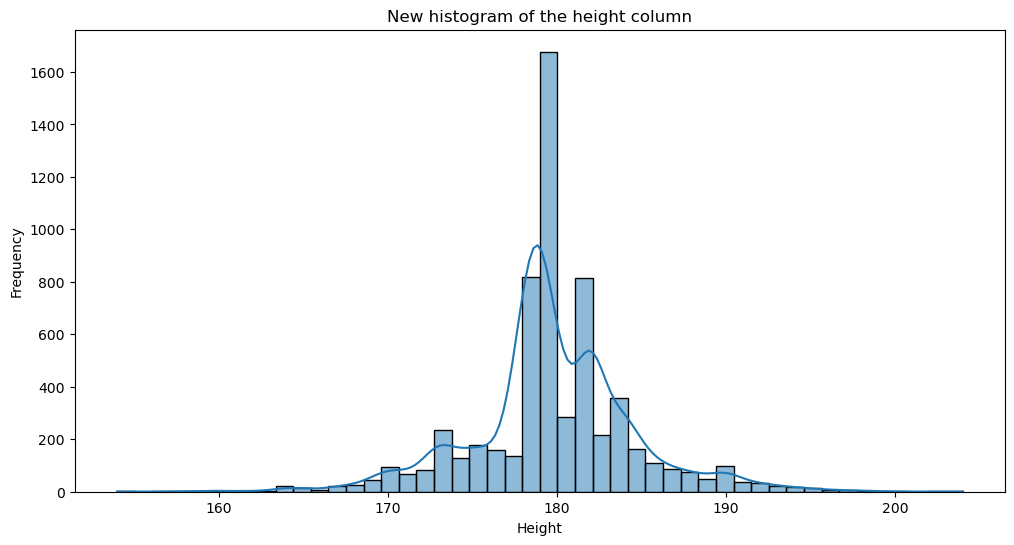

In [11]:
# Plot the histogram of the height column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['height'], kde=True, bins=n_bins_height)
plt.title('New histogram of the height column')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Only when are not missing values in both columns
# calculate the median weight based on the highth values
median_weight = cyclists.groupby('height')['weight'].median()
# calculate the median height based on the weight values
median_height = cyclists.groupby('weight')['height'].median()

In [13]:
#Reset the dataset
cyclists = pd.read_csv('dataset/cyclists.csv')
races = pd.read_csv('dataset/races.csv')

In [14]:
# Calculate the probability distribution of the weight and height columns
weights_distribution = cyclists['weight'].value_counts(normalize=True, dropna=True)
heights_distribution = cyclists['height'].value_counts(normalize=True, dropna=True)

In [15]:
np.random.seed(42)
cyclists['weight'] = cyclists['weight'].apply(lambda x: np.random.choice(weights_distribution.index, p=weights_distribution.values) if pd.isnull(x) else x)

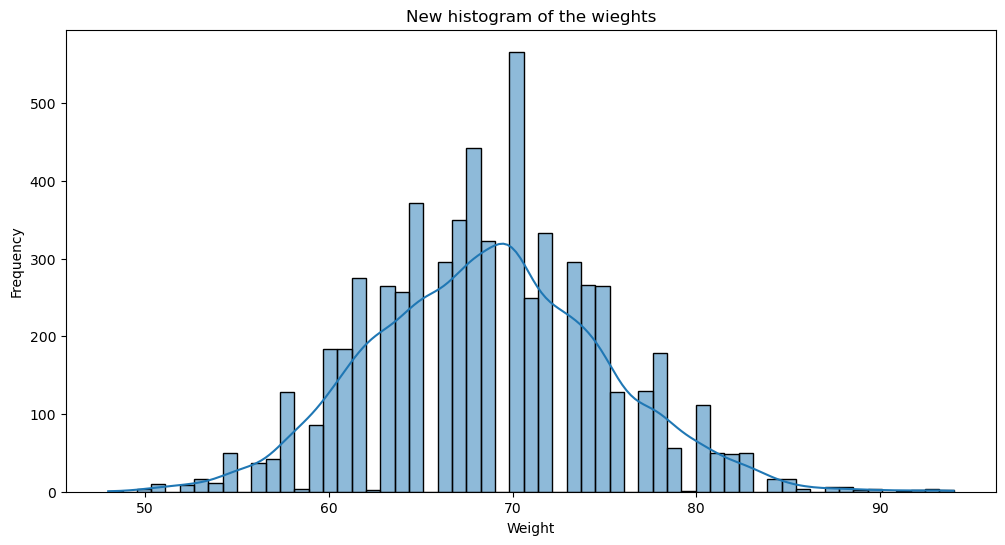

In [16]:
# Plot the histogram of the weight column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['weight'], kde=True, bins=n_bins_weight)
plt.title('New histogram of the wieghts')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


In [17]:
cyclists['height'] = cyclists['height'].apply(lambda x: np.random.choice(heights_distribution.index, p=heights_distribution.values) if pd.isnull(x) else x)

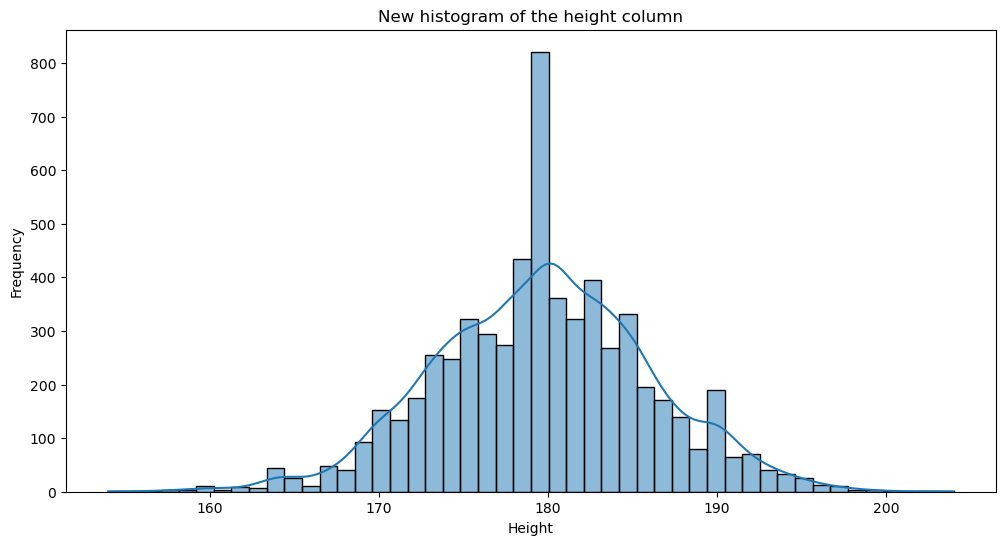

In [18]:
# Plot the histogram of the height column
plt.figure(figsize=(12, 6))
sns.histplot(cyclists['height'], kde=True, bins=n_bins_height)
plt.title('New histogram of the height column')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()